# LDA(Linear Discriminant Analysis)
LDA: 선형 판별 분석법  
PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법이지만 중요한 차이는 LDA는 지도학습에서 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소  
LDA는 입력 데이터의 결정 값 클래스를 최대한 분리할 수 있는 축을 찾는다

LDA는 특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산과 클래스 내부 분산의 비율을 최대화하는 방식으로 차원을 축소  
즉 클래스 간 분산은 최대한 크게, 클래스 내부 분산은 최대한 작게 가져가는 방식
LDA를 구하는 스텝은 클래스 간 분산과 클래스 내부 분산 행렬을 생성한 뒤 이 행렬에 기반해 고유벡터를 구하고 입력 데이터를 투영한다는 점

## 붓꽃 데이터 세트에 LDA 적용하기

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [5]:
lda = LinearDiscriminantAnalysis(n_components = 2)
#여기서 PCA와 다르게 LDA는 지도학습이다. 즉 클래스의 결정값이 변환시에 반드시 필요함
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


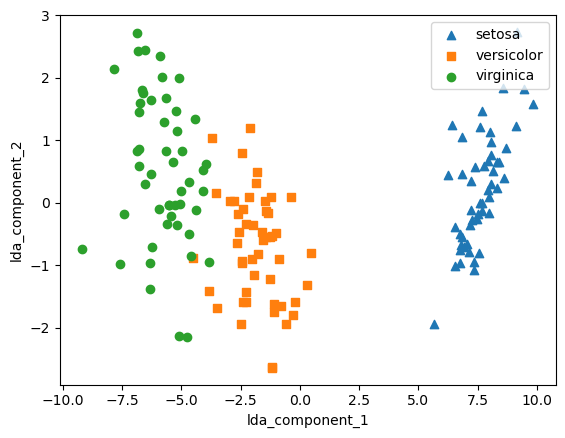

In [8]:
#lda변환된 입력 데이터 값을 2차원 평면에 품종별로 표현
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns = lda_columns)
irisDF_lda['target'] = iris.target

#setosa는 세모 versicolor는 네모 viriginica는 동그라미
markers = ['^', 's', 'o']

#setosa의 타겟값은 0, versicolor는 1, virginica는 2, 각 타겟 별로 다른 모양으로 산점도 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target'] == i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target'] == i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])

plt.legend(loc = 'upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()